# Machine Learning Pipline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$$w = (X^\top X)^{-1}X^\top y$$


# Toy Data 1




In [2]:
def generate_dataset(num_data, num_feat, data_heter=1, model_heter=1, noise_level=1, verbose=True, seed=None):
    assert data_heter > 0
    assert model_heter > 0
    assert noise_level > 0

    if seed:
        np.random.seed(seed)

    W = np.random.randn(num_feat, 1) * np.maximum(1, np.random.rand(num_feat, 1) * model_heter)
    b = np.random.randn()
        
    np.random.seed()
    X = np.random.randn(num_data, num_feat) * np.maximum(1, np.random.rand(1, num_feat) * data_heter)
    Y = X.dot(W) + b + np.random.randn(num_data, 1) * noise_level
    if verbose:
        print("data generated with random weights and bias: ")
        print("W", W)
        print("b", b)
        print("X shape", X.shape)
        print("Y shape", Y.shape)
    return X, Y, W, b

data generated with random weights and bias: 
W [[1.62434536]]
b -0.6117564136500754
X shape (1000, 1)
Y shape (1000, 1)
[0.25972483]


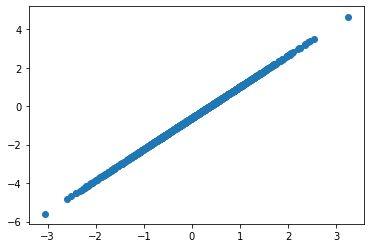

In [3]:
X, Y, *_ = generate_dataset(1000, 1, noise_level=1e-3, seed=1)
print(X[0])
plt.scatter(X, Y)
plt.show()

## Simple Linear Regression

In [4]:
X, y, W0, b0 = generate_dataset(1000, 2, seed=1)

data generated with random weights and bias: 
W [[ 1.62434536]
 [-0.61175641]]
b -0.5281717522634557
X shape (1000, 2)
Y shape (1000, 1)


In [5]:
def simple_linear_regression(X, y):
    num_sample, num_feat = X.shape
    X_cat = np.concatenate([X, np.ones((num_sample, 1))], axis=1)
    W_cat = np.linalg.inv(X_cat.T.dot(X_cat)).dot(X_cat.T).dot(y)
    return W_cat[:num_feat], W_cat[num_feat]

### Convergence analysis 收敛分析

In [7]:
# 评估经验误差
def eval_empirical_error(W1, b1, X, y):
    y_hat = X.dot(W1)+b1
    res = 0
    for i in range(len(y)):
        res += (y[i]-y_hat[i])**2
    res /= len(y)
    return res

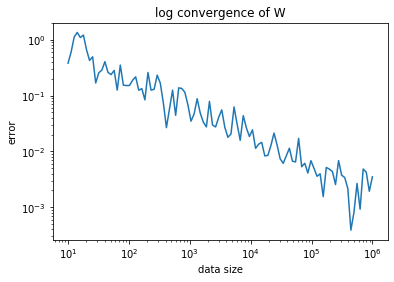

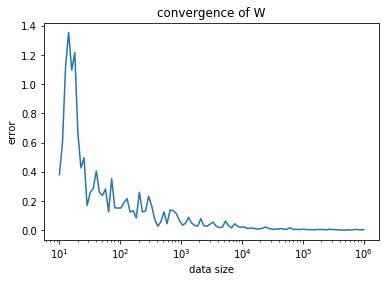

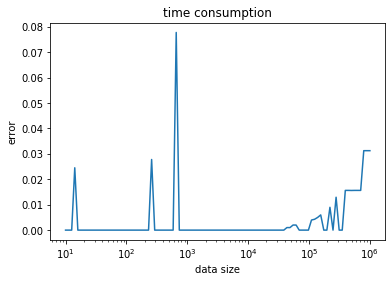

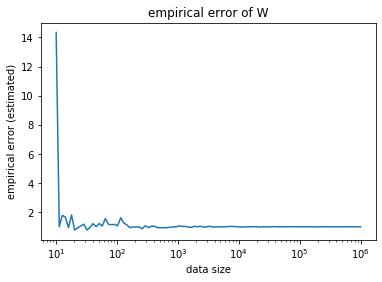

In [8]:
import time
num_samples = 100
num_data_list = np.logspace(1, 6, num_samples)
converge_list = np.zeros(num_samples, dtype='float')
time_list = np.zeros(num_samples, dtype='float')
empirical_error_list = np.zeros(num_samples, dtype='float')
for i, num_data in enumerate(num_data_list.tolist()):
    X, y, W0, b0 = generate_dataset(int(num_data), 2, verbose=False, seed=i)
    time.sleep(0.01)
    begin = time.time()
    W1, b1 = simple_linear_regression(X, y)
    converge_list[i] = np.linalg.norm(W1-W0) + np.linalg.norm(b1-b0)
    elapsed = time.time()-begin
    time_list[i] = float(time.time()-begin)
    X, y, W0, b0 = generate_dataset(int(num_data), 2, verbose=False, seed=i)
    empirical_error_list[i] = eval_empirical_error(W1, b1, X, y)

# plt.plot(num_data_list, converge_list)
plt.loglog(num_data_list, converge_list)
plt.title("log convergence of W")
plt.xlabel("data size")
plt.ylabel("error")
plt.show()

plt.semilogx(num_data_list, converge_list)
plt.title("convergence of W")
plt.xlabel("data size")
plt.ylabel("error")
plt.show()

plt.semilogx(num_data_list, time_list)
plt.title("time consumption")
plt.xlabel("data size")
plt.ylabel("error")
plt.show()

plt.semilogx(num_data_list, empirical_error_list)
plt.title("empirical error of W")
plt.xlabel("data size")
plt.ylabel("empirical error (estimated)")
plt.show()

# Toy Data 2

In [7]:
def generate_dataset2(num_data, num_feat, data_heter=1, model_heter=1, noise_level=1, verbose=True):
    assert data_heter > 0
    assert model_heter > 0
    assert noise_level > 0

    X = np.random.randn(num_data, num_feat) * np.maximum(1, np.random.rand(1, num_feat) * data_heter)
    W = np.random.randn(num_feat, 1) * np.maximum(1, np.random.rand(num_feat, 1) * model_heter)
    b = np.random.randn()
    
    Y = (X**2).dot(W) + b + np.random.randn(num_data, 1) * noise_level
    if verbose:
        print("data generated with random weights and bias: ")
        print("W", W)
        print("b", b)
        print("X shape", X.shape)
        print("Y shape", Y.shape)
    return X, Y, W, b

In [8]:
generate_dataset2(10, 1)

data generated with random weights and bias: 
W [[-0.98768883]]
b 0.4935947939645763
X shape (10, 1)
Y shape (10, 1)


(array([[ 0.55500789],
        [ 0.35140522],
        [-0.38454069],
        [ 2.04300626],
        [ 0.11771884],
        [ 2.54024688],
        [ 0.55299772],
        [ 1.80155747],
        [ 0.56461617],
        [ 0.95608246]]), array([[-0.15624371],
        [-0.26668517],
        [ 1.93025089],
        [-3.52836071],
        [-0.68227638],
        [-5.64953265],
        [-0.47965733],
        [-1.10013376],
        [-1.44371531],
        [-3.05148925]]), array([[-0.98768883]]), 0.4935947939645763)